# Method's for solving nonlinear equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
x0 = float(input("Please enter initial approximation: x0="))
eps = float(input("Please enter precision: eps="))

Please enter initial approximation: x0=0
Please enter precision: eps=0.01


In [184]:
X_MIN = x0 - 2
X_MAX = x0 + 2

## Let's define equation defition(in form f(x)=0)
### For next steps we also need it's derivative

In [185]:
def f(x):
    return np.power(x, 4) + np.power(x, 2) - 6*x + 2
def df_by_dx(x):
    return 4*np.power(x, 3) + 4*x - 6
def d2f_by_dx2(x):
    return 12*np.power(x, 2) + 4

### Specifiyng methods base class

In [186]:
class Method():
    def __init__(self, x0, eps):
        self.x0 = x0
        self.eps = eps
        self.x = None
        self.x_n = []
        self.n_fact = None
        self.n_th = None
        self.q = None

## Class for working with relaxation method

In [187]:
class Relaxation_method(Method):
    def __init__(self, x0, eps):
        super().__init__(x0, eps)
        self.tau = None
        
    def check_parameters(self, x_min, x_max, m1, M1):
        xs = np.arange(x_min, x_max, 0.001)
        for x in xs:
            der = np.abs(df_by_dx(x))
            if der < m1 or der > M1:
                return False
        return True
        
    def set_parameters(self, m1, M1):
        self.m1 = m1
        self.M1 = M1
        self.tau = 2/(m1 + M1)
        self.q = (M1 - m1)/(m1 + M1)
        if (df_by_dx(x0) > 0):
            self.tau *= -1
            return self.check_parameters(1.3, 1.5, m1, M1)
        else:
            return self.check_parameters(0.3, 0.4, m1, M1)
        
    def solve(self):
        x = self.x0
        x_prev = -1
        self.x_n = []
        self.n_fact = 0
        while np.abs(f(x)) > self.eps or np.abs(x - x_prev) > self.eps:
            x_prev = x
            x = x_prev + self.tau * f(x_prev)
            self.x_n.append(x)
            self.n_fact += 1
        self.x = x
        
    def calc_n_th(self):
        self.n_th = np.floor(np.log(np.abs(self.x0 - self.x) / self.eps) / np.log(1 / self.q) + 1) + 1
        

## Class for working with Newtons method

In [188]:
class Newtons_method(Method):
    def check_parameters(self, x_min, x_max, m1, M2):
        xs = np.arange(x_min, x_max, 0.001)
        if self.x0 < x_min or self.x0 > x_max:
            return False
        for x in xs:
            der = np.abs(df_by_dx(x))
            der2 = np.abs(d2f_by_dx2(x))
            if der < m1 or der2 > M2:
                print(der)
                print(der2)
                return False
        return True
        
    def set_parameters(self, a, b, m1, M2):
        self.m1 = m1
        self.M2 = M2
        return self.check_parameters(a, b, m1, M2)
        
    def solve(self):
        x = self.x0
        x_prev = -1
        self.x_n = []
        self.n_fact = 0
        while np.abs(f(x)) > self.eps or np.abs(x - x_prev) > self.eps:
            x_prev = x
            x = x_prev - f(x_prev)/df_by_dx(x_prev)
            self.x_n.append(x)
            self.n_fact += 1
        self.x = x
    
    def calc_n_th(self):
        self.q = np.abs((M2 * (self.x0 - self.x)/(2 * self.m1)))
        self.n_th = np.log(np.floor(np.log(np.abs(self.x0 - self.x) / eps) / np.log(1 / self.q) + 1), 2) + 1
        

## Function for visualization results

In [189]:
def plot_f(x_min, x_max, ax=None):
    xs = np.arange(x_min, x_max, (x_max - x_min)/1000)
    ax.plot(xs, f(xs))
    ax.axhline(0, c='black')

In [190]:
def plot_der(x_min, x_max, ax=None):
    xs = np.arange(x_min, x_max, (x_max - x_min)/1000)
    ax.plot(xs, df_by_dx(xs))

In [197]:
def plot_results(method):
    print("Result: x=", method.x)
    print("Number of iterations: ", method.n_fact)
    method.calc_n_th()
    print("Theoretical number of iterations: ", method.n_th)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(method.x_n, f(np.array(method.x_n)), '-->', c='C1')
    x_min = np.min(method.x_n)
    x_max = np.max(method.x_n)
    plot_f(x_min, x_max, ax)

## Main

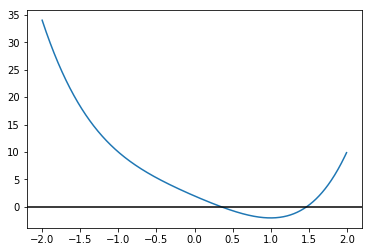

In [192]:
plot_f(X_MIN, X_MAX, plt)

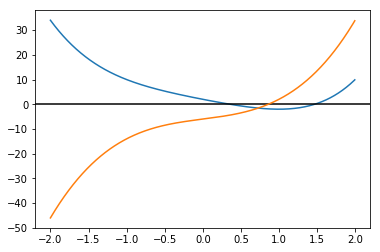

In [193]:
plot_f(X_MIN, X_MAX, plt)
plot_der(X_MIN, X_MAX, plt)

So we can see that derivative is monotonic near the roots. <br>
Also we can see 2 roots, one is about 0.3-0.4 and second is about 1.3-1.5.<br>
For first derivative is less then 0, for second greater than zero<br>

# Applying Newton's method

Enter a=-0.1
Enter b=0.5
Enter m1=1.5
Enter M2=7
Number of iterations:  3
Theoretical number of iterations:  21.0


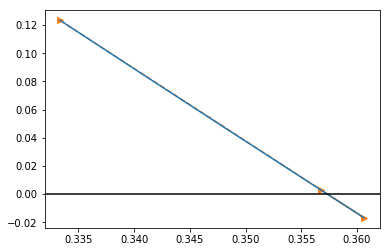

In [195]:
newton_method = Newtons_method(x0, eps)
a = float(input("Enter a="))
b = float(input("Enter b="))
m1 = float(input('Enter m1='))
M2 = float(input('Enter M2='))
if newton_method.set_parameters(a, b, m1, M2):
    newton_method.solve()
    plot_results(newton_method)
else:
    print("Bad Parameters")

In [200]:
print(newton_method.q)

0.8324828961361873


# Applying relaxation method

Enter m1=1.5
Enter M1=5
Number of iterations:  10
Theoretical number of iterations:  7.0


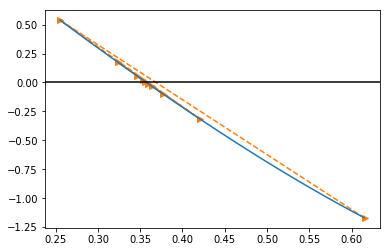

In [196]:
relaxation_method = Relaxation_method(x0, eps)
m1 = float(input('Enter m1='))
M1 = float(input('Enter M1='))
if relaxation_method.set_parameters(m1, M1):  
    relaxation_method.solve()
    plot_results(relaxation_method)
else:
    print("Bad parameters")

In [199]:
print(relaxation_method.q)

0.5384615384615384
